In [40]:
import os
import pandas as pd
import numpy as np
from sklearn import metrics
os.chdir('C:/Users/xushi/Dropbox (个人)/21fall/hw6/travelers-competition-exploratory-analysis-lm/input')
mydata = pd.read_csv('encoded_train.csv')
mydata.columns

Index(['claim_number', 'age_of_driver', 'marital_status', 'safty_rating',
       'annual_income', 'high_education_ind', 'address_change_ind',
       'past_num_of_claims', 'witness_present_ind', 'liab_prct',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_price', 'vehicle_weight', 'fraud', 'claim_month', 'claim_day',
       'claim_year', 'gender_m', 'living_status_rent', 'accident_site_local',
       'accident_site_parking_lot', 'channel_online', 'channel_phone',
       'vehicle_color_blue', 'vehicle_color_gray', 'vehicle_color_other',
       'vehicle_color_red', 'vehicle_color_silver', 'vehicle_color_white',
       'state_co', 'state_ia', 'state_pa', 'state_va'],
      dtype='object')

In [43]:
##########  split   ##########  
from sklearn import model_selection
y = mydata.fraud
X = mydata.loc[:,['age_of_driver', 'marital_status', 'safty_rating','annual_income','high_education_ind', 
                  'address_change_ind','past_num_of_claims', 'witness_present_ind','liab_prct','policy_report_filed_ind',
                  'claim_est_payout', 'age_of_vehicle','vehicle_price','vehicle_weight','claim_month',
                   'claim_day','claim_year', 'gender_m', 'living_status_rent', 'accident_site_local',
                  'accident_site_parking_lot', 'channel_online','channel_phone', 'vehicle_color_blue','vehicle_color_gray',
                   'vehicle_color_other','vehicle_color_red','vehicle_color_silver', 'vehicle_color_white','state_co',
                   'state_ia', 'state_pa', 'state_va']]
X_train, X_test, y_train, y_test=model_selection.train_test_split(X, y, 
                                                                  test_size=0.2, random_state=123)
##########  Resample   ########## 
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[1,4,5,7,9,22,23,24,25,26,27,28,29,30,31,32], random_state=0)

X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)
from sklearn.preprocessing import StandardScaler
X_train_res = StandardScaler().fit_transform(X_train_res)
X_test = StandardScaler().fit_transform(X_test)
X_train = StandardScaler().fit_transform(X_train)


# dimension reduction 

# UMAP

In [15]:
import umap
umap_reducer = umap.UMAP()
embedding = umap_reducer.fit_transform(X_train_res)

c:\users\xushi\appdata\local\programs\python\python37\lib\site-packages\numba\np\ufunc\parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11004. The TBB threading layer is disabled.
  warnings.warn(problem)


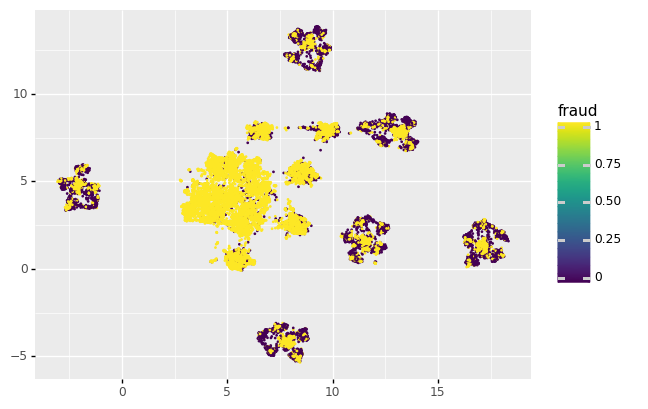

<ggplot: (-9223371881073155412)>

In [35]:
from plotnine import *
ggplot(aes(x=embedding[:,0],y=embedding[:,1],color=y_train_res))+geom_point(size=0.1)

## PCA

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
X_train_res = pca.fit_transform(X_train_res)
X_test = pca.fit_transform(X_test)
pca.explained_variance_ratio_

array([0.07071341, 0.0507222 , 0.04068521, 0.03928866, 0.03910933,
       0.03813001, 0.0365135 , 0.03604009, 0.0358937 , 0.03541413,
       0.03478578, 0.03380929, 0.03280757, 0.03238206, 0.0318499 ,
       0.03098253, 0.03066377, 0.03050323, 0.02985219, 0.02961056,
       0.02912012, 0.02895468, 0.02859099, 0.0280251 , 0.02749093,
       0.02729381, 0.02654291, 0.02168882, 0.01850522, 0.01107335])

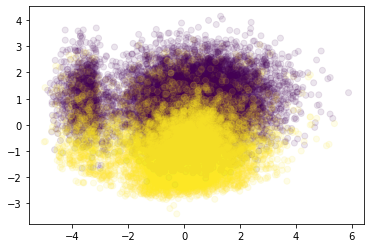

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X_train_res[:,0],X_train_res[:,1],c=y_train_res,alpha=0.1)

## Locally linear embedding

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2)
X_trans = embedding.fit_transform(X_train_res[:1000,:])
plt.scatter(X_trans[:,0],X_trans[:,1],c=y_train_res.iloc[:1000],alpha=0.2)

In [ ]:
from sklearn.svm import SVC
clf_svm=SVC(random_state=1)
clf_svm.fit(X_train_res,y_train_res)
pred_svm=clf_svm.predict(X_test)
print(metrics.f1_score(y_test,pred_svm))

# Fit XGBoost

In [79]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',max_depth=2,eta=0.2)
clf_xgb.fit(X_train_res, y_train_res)
pred_xgb = clf_xgb.predict(X_test)
print(metrics.f1_score(y_test,pred_xgb))

0.3349609375


# Fit RandomForest

In [82]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(n_estimators=100,max_features='auto',max_depth=3)
clf_rf.fit(X_train_res,y_train_res)
pred_rf=clf_rf.predict(X_test)
print(metrics.f1_score(y_test,pred_rf))

0.315921963499056


# Fit Logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression( random_state=1)
clf_lr.fit(X_train_res,y_train_res)
pred_lr=clf_lr.predict(X_test)
print(metrics.f1_score(y_test,pred_lr))

0.3379109446525177


# Fit SVM

In [ ]:
from sklearn.svm import SVC
clf_svm=SVC(kernel='rbf',random_state=1,gamma=0.001,C=10)
clf_svm.fit(X_train_res,y_train_res)
pred_svm=clf_svm.predict(X_test)
print(metrics.f1_score(y_test,pred_svm))

# Ensemble models: voting classifier

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
eclf1 = VotingClassifier(estimators=[('lr', clf_lr), ('rf', clf_rf), ('xgb', clf_xgb)], voting='hard')
eclf1 = eclf1.fit(X_train_res,y_train_res)
pred_eclf1=eclf1.predict(X_train_res)
print(metrics.f1_score(y_test,pred_eclf1))

# Try to use other cutoff for probability

In [ ]:
def cut(prob,cutoff):
    ind = []
    for k in prob:
        if k>cutoff:
            ind.append(1)
        else:
            ind.append(0)    
    return ind
        

In [ ]:
prf = cut(clf_rf.predict_proba(X_test)[:,0],0.3)
print(metrics.f1_score(y_test,prf))

In [ ]:
pxgb = cut(clf_xgb.predict_proba(X_test)[:,0],0.4)
print(metrics.f1_score(y_test,pred_xgb))

All the basic models including Random forest, XGBoost does not work well on the training data. Possibly some further processing should be done to the data.